<a href="https://colab.research.google.com/github/hepuliu/DSS_Project_Backend/blob/main/sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Master Thesis Simulation Sandbox
Flood Prevention Dam Sizing with Machine Learining Approaches - Hepu Liu

### Overall Project Simulation Steps
1. Process discharge data from Waldangelbach Station

2. Process precipitation data from Baiertal  Station

3. Build Prediction Model (Model A)

4. Process precipitation data from Stifterhof Station

5. Process precipitation data from Waibstadt Station (optional)

6. Process precipitation data from Stetten Station (optional

7. Fit data to Model A to predict discharge

### Variable Naming Conventions

- Weather Stations Naming: ('p' for precipitation, 'd' for discharge, 'a' to 'd' for different stations, 'r' for result)

  - da: Waldangelbach Station
  - pa: Baiertal Station
  - pb: Stifterhof Station
  - pc: Waibstadt Station
  - pd: Stetten Station
  - pr: combined/resulting precipitation
  - dr: predicted/resulting discharge

- Variable Naming Coventions: 
  - df: data frame
  - trs: training set
  - tes: testing set



## Importing Libraries

In [15]:
# importing libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet
from google.colab import drive
drive.mount

<function google.colab.drive.mount>

## Importing Datasets

In [16]:
# import datasets
da_df = pd.read_csv('/content/drive/MyDrive/thesis/dataset/cleaned_df/da_df.csv')
pa_df = pd.read_csv('/content/drive/MyDrive/thesis/dataset/cleaned_df/pa_df.csv')
pb_df = pd.read_csv('/content/drive/MyDrive/thesis/dataset/cleaned_df/pb_df.csv')
da_df.head()

,t,discharge [m3/s]
0,2007-01-01 00:00:00,0.226
1,2007-01-01 01:00:00,0.248
2,2007-01-01 02:00:00,0.248
3,2007-01-01 03:00:00,0.320
4,2007-01-01 04:00:00,0.346


## Data Processing

In [17]:
da_df.columns = ['t','d']
# da_df['t'] = 
da_df = da_df[:20000]
da_df

,t,d
0,2007-01-01 00:00:00,0.226
1,2007-01-01 01:00:00,0.248
2,2007-01-01 02:00:00,0.248
3,2007-01-01 03:00:00,0.320
4,2007-01-01 04:00:00,0.346
...,...,...
19995,2009-04-13 03:00:00,0.295
19996,2009-04-13 04:00:00,0.295
19997,2009-04-13 05:00:00,0.295
19998,2009-04-13 06:00:00,0.295


## Data Visualization

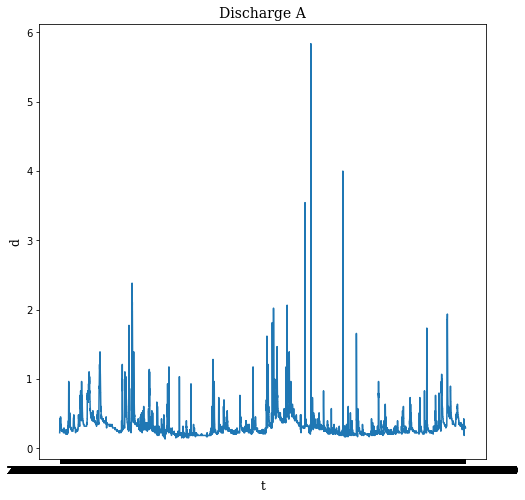

In [18]:
# Plot Line Graph 20000 row with GPU = 3mins
def line_plot(df, title):
  label_font = {'family':'serif', 'color':'black', 'size':'12'}
  title_font = {'family':'serif', 'color':'black', 'size':'14'}
  fig = plt.figure(figsize=(8,8))
  plt.plot(df['t'], df['d'])
  plt.xlabel( 't', fontdict = label_font)
  plt.ylabel( 'd', fontdict = label_font)
  plt.title(title, fontdict = title_font)
   
# line_plot(da_df, 'Discharge A')


# Archive

In [19]:
# # Cleanup Discharge A DataFrame da_df
# da_df = pd.read_csv('/content/drive/MyDrive/thesis/dataset/Wiesloch_waldangelbach_hourly_20070101-20210501.csv')
# da_df = da_df.iloc[13:].reset_index(drop=True)
# da_df.columns = da_df.iloc[0]
# da_df = da_df.iloc[3:].reset_index(drop=True)
# da_df = da_df.iloc[:, 4:7] # precipitation unit [m3/s]
# da_df['Uhrzeit'] = da_df['Uhrzeit'].str.replace(' v', '')
# da_df['t'] = pd.to_datetime(da_df['Datum']+' '+da_df['Uhrzeit'], format=('%y-%m-%d %H:%M:%S'))
# da_df = da_df.iloc[:,2:]
# da_df.columns = ['discharge [m3/s]', 't']
# da_df = da_df[['t','discharge [m3/s]']]
# da_df.to_csv('/content/drive/MyDrive/thesis/dataset/cleaned_df/da_df.csv', index=False)

In [20]:
# # Cleanup Precipitation A DataFrame pa_df
# pa_df = pd.read_csv('/content/drive/MyDrive/thesis/dataset/Weather_station_Baiertal.csv')
# pa_df.columns = pa_df.iloc[0]
# pa_df = pa_df.iloc[1:].reset_index(drop=True)
# pa_df['t'] = pd.to_datetime(pa_df['date']+' '+pa_df['time'], format=('%y-%m-%d %H:%M'))
# pa_df = pa_df.iloc[:,2:]
# cols = list(pa_df.columns)
# cols = [cols[-1]] + cols[:-1]
# pa_df = pa_df[cols]
# pa_df.to_csv('/content/drive/MyDrive/thesis/dataset/cleaned_df/pa_df.csv', index=False)


In [21]:
# # Cleanup Precipitation B DataFrame pb_df
# pb_df = pd.read_csv('/content/drive/MyDrive/thesis/dataset/Weather_station_Stifterhof.csv')
# pb_df.columns = pb_df.iloc[0]
# pb_df = pb_df.iloc[1:].reset_index(drop=True)
# pb_df['t'] = pd.to_datetime(pb_df['date']+' '+pb_df['time'], format=('%y-%m-%d %H:%M'))
# pb_df = pb_df.iloc[:,2:]
# cols = list(pb_df.columns)
# cols = [cols[-1]] + cols[:-1]
# pb_df = pb_df[cols]
# pb_df.to_csv('/content/drive/MyDrive/thesis/dataset/cleaned_df/pb_df.csv', index=False)